In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

coulmns_should_be_integer_type_of_data = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool"]
coulmns_should_be_float_type_of_data = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart",\
                                        "resultspeed", "resultdir", "avgspeed"]

import pickle
import costum_functions as cf

slack_url = pickle.load(open("send_url.pickle", "rb"))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_train_with_weather = pd.read_csv("df_train_with_weather_201806251508.csv")

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [24]:
df = df_train_with_weather[["item_nbr", "units"]]

In [26]:
df = df.groupby("item_nbr").agg(["max", "mean"])

In [2]:
df = df_train_with_weather[df_train_with_weather["station_nbr"] == 3]

In [4]:
def changeType(a):
    if(a != "M"):
        return int(a)
    else:
        return 0

In [5]:
def changeFloatType(a):
    a = str(a).strip()
    if(a != "M" and a.strip() != "T"):
        return float(a)
    else:
        return 0

In [6]:
df["units"] = df["units"].apply(changeType)

In [7]:
df["tavg"] = df["tavg"].apply(changeType)

In [8]:
df["snowfall"] = df["snowfall"].apply(changeFloatType)

In [9]:
df["depart"] = df["depart"].apply(changeType)

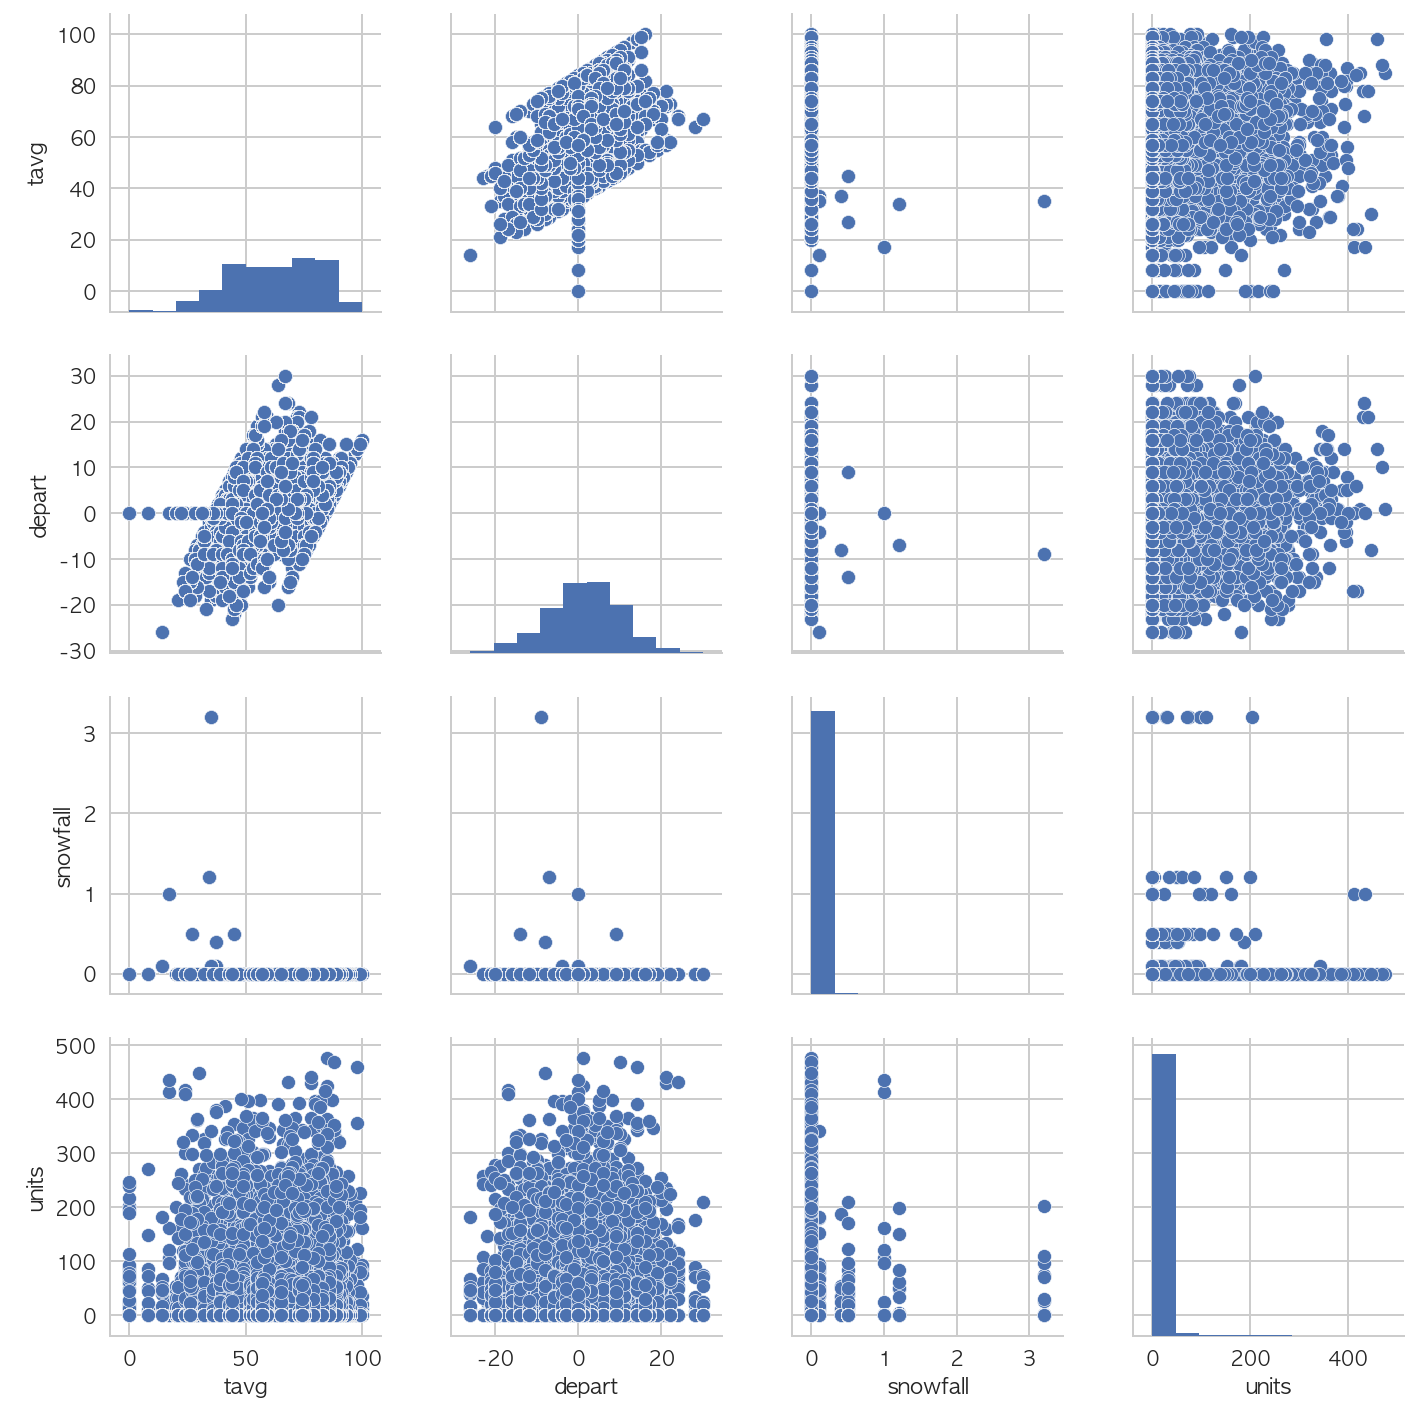

In [10]:
cols = ["tmax", "tavg", "depart", "snowfall", "units"]
sns.pairplot(df[cols])
plt.show()

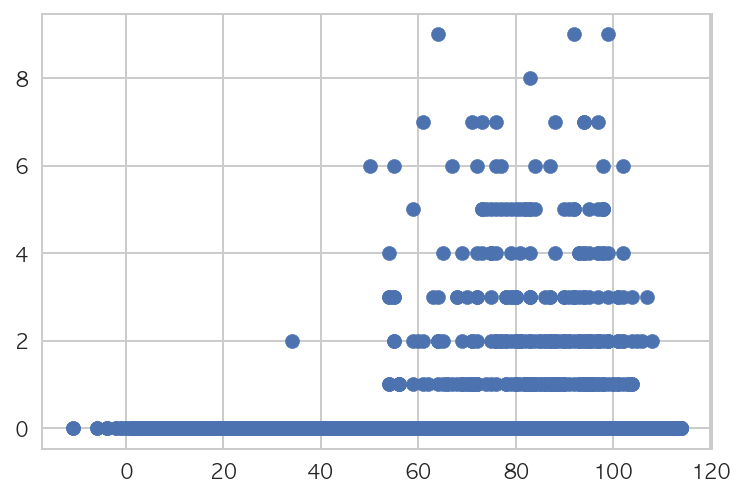

In [24]:
plt.scatter(item_1_without_tmax_M["tmax"], item_1_without_tmax_M["units"])
plt.show()

In [14]:
import calendar

In [22]:
import datetime

In [19]:
cal = calendar.Calendar()

In [39]:
df.reset_index(drop = True, inplace=True)

In [61]:
def addDays(date):
    temp = date.split("-")
    year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
    return datetime.datetime(year, month, date).weekday()

In [65]:
df_train_with_weather["day"] = df_train_with_weather["date"].apply(addDays)

In [67]:
df_train_with_weather.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day
4617595,2014-10-31,39,107,0,8,78,55,67,M,M,...,-,RA,M,T,29.82,M,M,M,5.1,4
4617596,2014-10-31,39,108,0,8,78,55,67,M,M,...,-,RA,M,T,29.82,M,M,M,5.1,4
4617597,2014-10-31,39,109,0,8,78,55,67,M,M,...,-,RA,M,T,29.82,M,M,M,5.1,4
4617598,2014-10-31,39,110,0,8,78,55,67,M,M,...,-,RA,M,T,29.82,M,M,M,5.1,4
4617599,2014-10-31,39,111,2,8,78,55,67,M,M,...,-,RA,M,T,29.82,M,M,M,5.1,4


In [68]:
cf.saveDataFrameToCsv(df_train_with_weather, "df_train_weather_and_day")